<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_30_Function_Transformer_Log_Transform_Reciprocal_Transform_Square_Root_Transform/Lecture_30_Function_Transformer_Log_Transform_Reciprocal_Transform_Square_Root_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [56]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [57]:
df = pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])

In [58]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [59]:
df.sample(5)

,Survived,Age,Fare
603,0,44.0,8.0500
280,0,65.0,7.7500
601,0,NaN,7.8958
365,0,30.0,7.2500
492,0,55.0,30.5000


In [60]:
# replacing all the missing values in age using fillna of panda library

df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-60-076b4db1e00d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [61]:
x= df.iloc[:,1:3]
y= df.iloc[:,0]

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

<ipython-input-63-e6e6a8d8a281>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


Text(0.5, 1.0, 'Age QQ Plot')

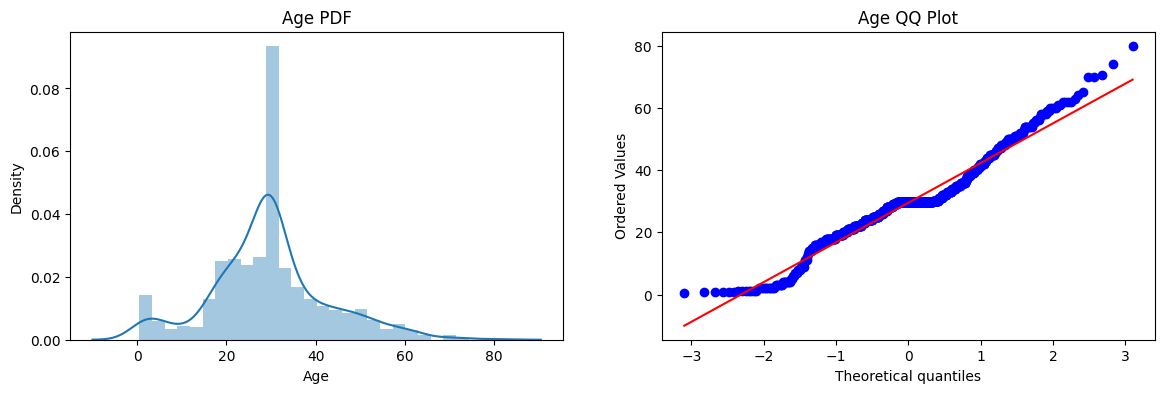

In [63]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(1,2,2)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')


<ipython-input-64-3b254a9d3799>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


Text(0.5, 1.0, 'Age QQ Plot')

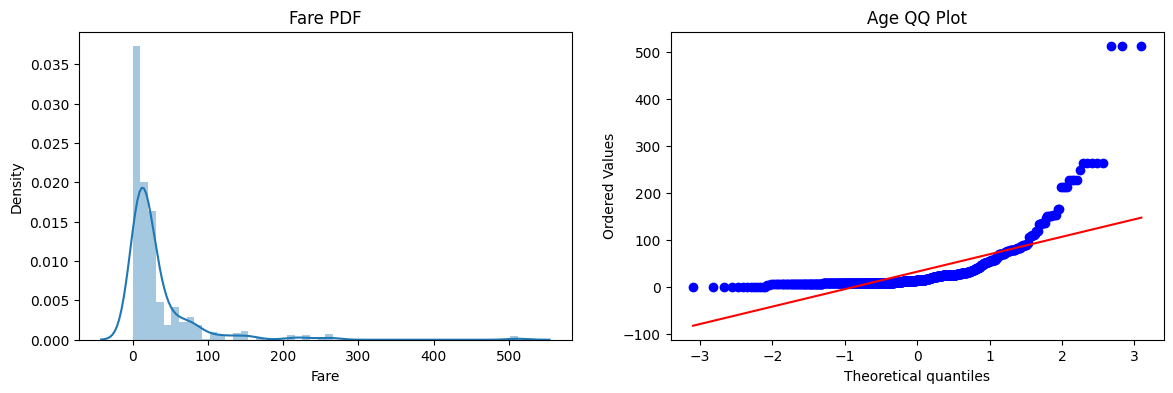

In [64]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(1,2,2)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Age QQ Plot')


In [65]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [66]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred2))

Accuracy LR 0.6480446927374302
Accuracy DT 0.659217877094972


In [68]:
trf = FunctionTransformer(func=np.log1p)


In [69]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.transform(x_test)

In [70]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred2))

Accuracy LR 0.7374301675977654
Accuracy DT 0.5865921787709497


In [71]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6611235955056181


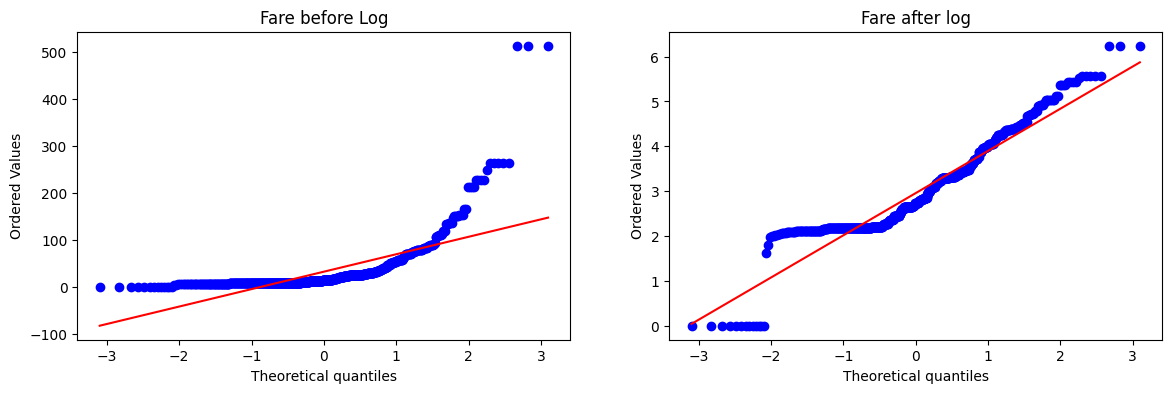

In [72]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Fare before Log')

plt.subplot(1,2,2)
stats.probplot(x_train_transformed['Fare'],dist="norm",plot=plt)
plt.title('Fare after log')

plt.show()

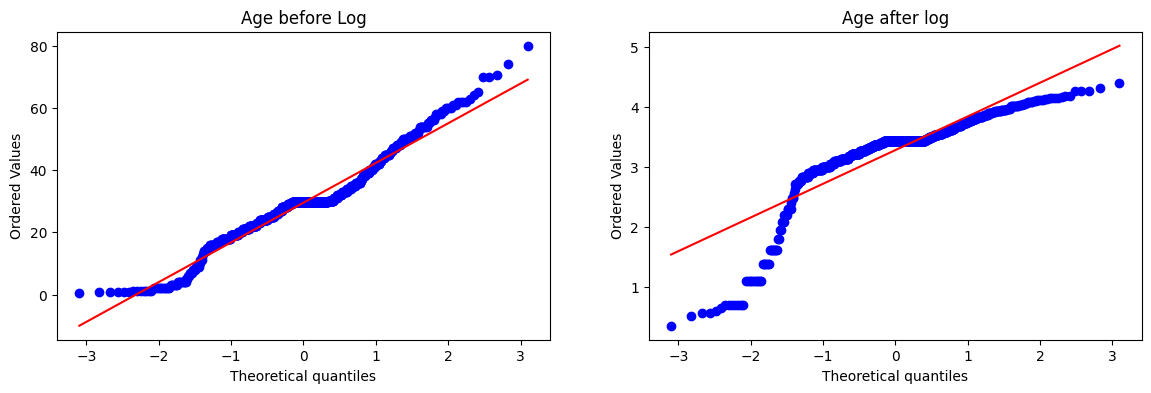

In [73]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age before Log')

plt.subplot(1,2,2)
stats.probplot(x_train_transformed['Age'],dist="norm",plot=plt)
plt.title('Age after log')

plt.show()

In [74]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)



In [75]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)

y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred2))


Accuracy LR 0.6703910614525139
Accuracy DT 0.659217877094972


In [76]:
x_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6565917602996254


In [79]:
# writing a function for transformaton
def apply_transform (transform):
  x = df.iloc[:,1:3]
  y = df.iloc[:,0]

  trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

  x_trans = trf.fit_transform(x)

  clf = LogisticRegression()

  print("Accuracy",np.mean(cross_val_score(clf,x_trans,y,scoring='accuracy',cv=10)))

  plt.figure(figsize=(14,4))

  plt.subplot(1,2,1)
  stats.probplot(x['Fare'],dist="norm",plot=plt)
  plt.title('Fare before Log')

  plt.subplot(1,2,2)
  stats.probplot(x_trans[:,0], dist = 'norm', plot = plt)
  plt.title('Fare after log')

  plt.show()

Accuracy 0.6589013732833957


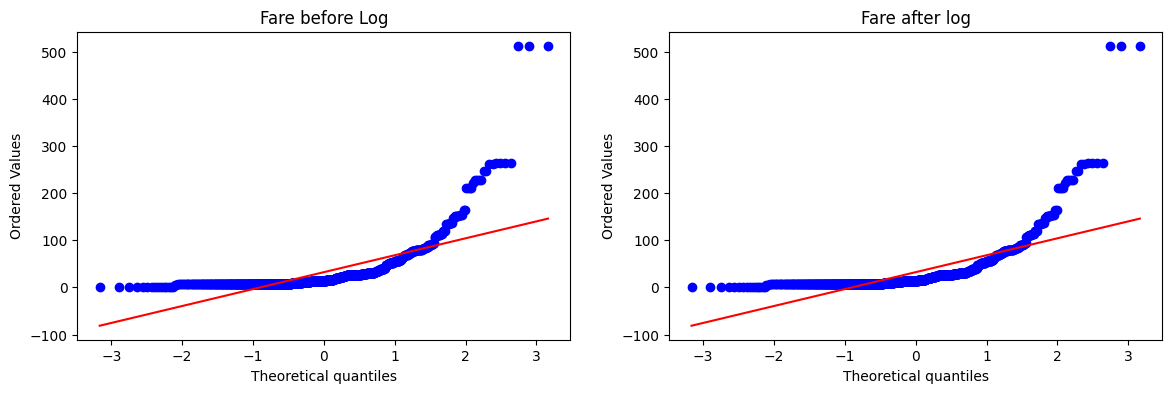

In [85]:
apply_transform(lambda x: x)